In [1]:
from langgraph.graph import StateGraph, START,  END
from langchain_openai import  ChatOpenAI 
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage , HumanMessage
from dotenv import load_dotenv
from langgraph.checkpoint.memory import MemorySaver #saves conv in memory(RAM)

In [2]:
load_dotenv()

True

In [3]:
llm = ChatOpenAI( model = "gpt-4o-mini")


In [4]:

from langgraph.graph.message import add_messages # use to add all messages

# define  a state 
class ChatState(TypedDict):
    
    messages : Annotated[list[BaseMessage], add_messages ] # all messages will be added(work aS reducer)
    

In [5]:


# making node function for chat

def chat_node(state: ChatState):
    
    # user query
    messages= state['messages']
    
    
    # send to llm
    response = llm.invoke(messages)
    
    #response resturn state
    return {"messages": [response]} 
   # puuting respoonse in list because we are appending messages in in list in  a STATE
    
    

In [10]:
# persistence memory 
checkpointer = MemorySaver()

# DEFINE A graph
graph= StateGraph(ChatState)

# add nodes
graph.add_node( "chat_node", chat_node)


#add edges
graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

# compile the graph
chatbot= graph.compile(checkpointer=checkpointer)

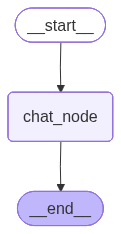

In [11]:
chatbot

In [14]:
initial_state = {
    "messages" : [HumanMessage(content="what is the capital of pakistan")]
}
    # adding config and thread_id for memory
    
config ={"configurable": {"thread_id":"1"} }
    
final_state=chatbot.invoke(initial_state, config=config) 

In [16]:
final_state['messages'][-1].content

'The capital of Pakistan is Islamabad. If you have any more questions or need information on a different topic, feel free to ask!'

In [ ]:
thread_id = '1' # session id

while True:
    
    user_message = input("Type here:")
    
    print("USER: ", user_message)
    
    
    
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    
    config={"configurable": {"thread_id":thread_id}} # using threadid to save our conversation
    
    response = chatbot.invoke({"messages": [HumanMessage(content= user_message)]} , config=config )
    
    
    print("CHATBOT: ", response['messages'][-1].content)

USER:  hi
CHATBOT:  Hello! How can I assist you today?
USER:  my name is wasid
CHATBOT:  Nice to meet you, Wasid! How can I help you today?
USER:  what is my name ?
CHATBOT:  Your name is Wasid. How can I assist you further?
USER:  add 2 +2 
CHATBOT:  2 + 2 equals 4. If you have any more questions or need further assistance, feel free to ask!
USER:  add 6 to the result
CHATBOT:  Adding 6 to the previous result (4) gives you 10. If you have any more calculations or questions, let me know!
USER:  bye
